In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split

In [22]:
#data loading
df = pd.read_csv("C:/Users/aniket sudrik/Desktop/Pandas/beans_data.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [21]:
df.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In [4]:
df.shape

(13611, 17)

In [5]:
df.size

231387

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [7]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [8]:
#check for missing or null values
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [9]:
#Null values in %
df.isnull().mean()*100

Area               0.0
Perimeter          0.0
MajorAxisLength    0.0
MinorAxisLength    0.0
AspectRation       0.0
Eccentricity       0.0
ConvexArea         0.0
EquivDiameter      0.0
Extent             0.0
Solidity           0.0
roundness          0.0
Compactness        0.0
ShapeFactor1       0.0
ShapeFactor2       0.0
ShapeFactor3       0.0
ShapeFactor4       0.0
Class              0.0
dtype: float64

In [10]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

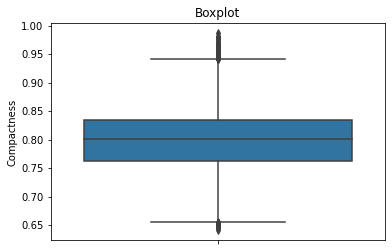

In [18]:
#Outlier Detection
sns.boxplot(y = df["Compactness"])
plt.title("Boxplot")
plt.show()

In [25]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [26]:
#Training and testing the dataset

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
#Random Forest

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


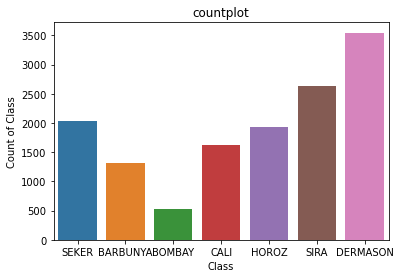

In [23]:
sns.countplot(df['Class'])
plt.xlabel('Class')
plt.ylabel('Count of Class')
plt.title('countplot')
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = 'gini', max_depth = 5, min_samples_split =10, random_state = 42)

In [28]:
#fiiting the data
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [29]:
#feature importance
clf.feature_importances_

array([0.06836964, 0.09791788, 0.08431381, 0.09839506, 0.07084203,
       0.06264042, 0.08689722, 0.0591621 , 0.0005565 , 0.00108169,
       0.02046668, 0.0876432 , 0.11009058, 0.04041743, 0.1060856 ,
       0.00512017])

In [30]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [31]:
#predicting the data
y_pred = clf.predict(X_test)

In [32]:
y_pred

array(['SEKER', 'BARBUNYA', 'SEKER', ..., 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred)

array([[263,   0, 106,   0,   0,   4,  22],
       [  0, 161,   0,   0,   0,   0,   0],
       [ 46,   0, 420,   0,   6,   1,   6],
       [  0,   0,   0, 951,   2,  18,  72],
       [  2,   0,  20,   7, 532,   0,  27],
       [  6,   0,   0,  15,   0, 575,  23],
       [  0,   0,   6,  78,   3,   7, 705]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score (y_test, y_pred)

0.8832027424094026

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=10)

array([0.89192025, 0.89087093, 0.89716684, 0.89192025, 0.87827912,
       0.89716684, 0.88247639, 0.88655462, 0.88655462, 0.87605042])

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

    BARBUNYA       0.67      0.83      0.74       317
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.88      0.76      0.81       552
    DERMASON       0.91      0.90      0.91      1051
       HOROZ       0.90      0.98      0.94       543
       SEKER       0.93      0.95      0.94       605
        SIRA       0.88      0.82      0.85       855

    accuracy                           0.88      4084
   macro avg       0.88      0.89      0.88      4084
weighted avg       0.89      0.88      0.88      4084



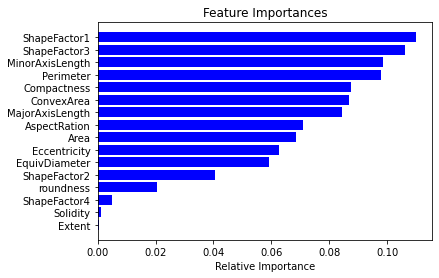

In [37]:
feature = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b')
plt.yticks(range(len(indices)), [feature [i] for i in indices]) 
plt.xlabel('Relative Importance')
plt.show()

In [38]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [39]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, min_samples_split = 9, random_state = 10)

In [40]:
#fitting
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=9, random_state=10)

In [41]:
#feature importance
clf.feature_importances_

array([0.00929153, 0.1794981 , 0.20225962, 0.08444784, 0.00061368,
       0.00048725, 0.00196839, 0.00141235, 0.002055  , 0.00128132,
       0.04700564, 0.24051955, 0.19727311, 0.00034295, 0.02173831,
       0.00980536])

In [42]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [43]:
#predicting
y_pred = clf.predict(X_test)

In [44]:
y_pred

array(['SEKER', 'BARBUNYA', 'SEKER', ..., 'HOROZ', 'SEKER', 'BARBUNYA'],
      dtype=object)

In [45]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[335,   0,  39,   0,  11,   2,   8],
       [  0, 161,   0,   0,   0,   0,   0],
       [ 21,   0, 434,   0,  21,   1,   2],
       [  1,   0,   0, 960,   2,  21,  59],
       [  4,   0,   6,   7, 559,   0,  12],
       [  6,   0,   0,  23,   0, 575,  15],
       [  1,   0,   0,  89,  16,  16, 677]], dtype=int64)

In [46]:
#accuracy
accuracy_score(y_test, y_pred)

0.9062193927522038

In [47]:
#cross validation score
cross_val_score(clf, X_train, y_train, cv=10)

array([0.92130115, 0.89926548, 0.90241343, 0.89821616, 0.89296957,
       0.90766002, 0.89192025, 0.9012605 , 0.88655462, 0.89705882])

In [48]:
#classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

    BARBUNYA       0.85      0.91      0.88       368
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.91      0.91      0.91       479
    DERMASON       0.92      0.89      0.90      1079
       HOROZ       0.95      0.92      0.93       609
       SEKER       0.93      0.93      0.93       615
        SIRA       0.85      0.88      0.86       773

    accuracy                           0.91      4084
   macro avg       0.91      0.92      0.92      4084
weighted avg       0.91      0.91      0.91      4084



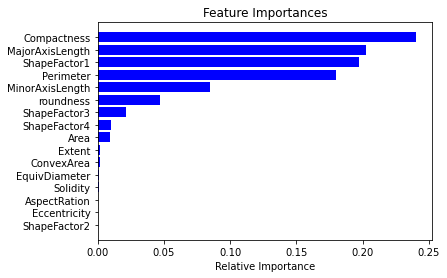

In [49]:
feature = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b')
plt.yticks(range(len(indices)), [feature [i] for i in indices]) 
plt.xlabel('Relative Importance')
plt.show()